## Iris Flower Classification

## BUSINESS UNDERSTANDING

## Overview


The Iris Flower Classification project aims to create a machine learning model that categorizes iris flowers into their respective species using specific measurements. The three species—setosa, versicolor, and virginica—each have unique characteristics based on these measurements.

## OBJECTIVE

+ The objective is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

__Project Details:__

+ Iris Species: The dataset consists of iris flowers, specifically from the species setosa, versicolor, and virginica.
+ Key Measurements: The essential characteristics used for classification include sepal length, sepal width, petal length, and petal width.

Analytical qustions

1. Which species of Iris is most prevalent in our dataset, and how might this influence our inventory or sales strategies?
2. Can the size and shape of the sepal be used to create a quality grading system for iris plants?
3. What are the key distinguishing features between the different species that can be highlighted in a catalog to attract customers?

__Hypothesis__

+ Null Hypothesis (H₀)
The mean petal length is the same for all three species of iris flowers.

+ Alternative Hypothesis (H₁)
At least one species of iris flowers has a mean petal length that is different from the others.

__Load packages__

In [54]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from scipy.stats import chi2_contingency
import joblib


# visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [55]:
# Load data

data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
# check the shape of data
data.shape

(150, 6)

+ There are 150 observations and 6 features

Check the unique values of Species column

In [57]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [58]:
# # set index to a specific column
# data.set_index('Id', inplace=True)

# data

In [59]:
data = data.drop(columns='Id')


In [60]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## DATA UNDERSTANDING

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [62]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

+ Dataset has no null values

In [63]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


__Univariate Analysis__

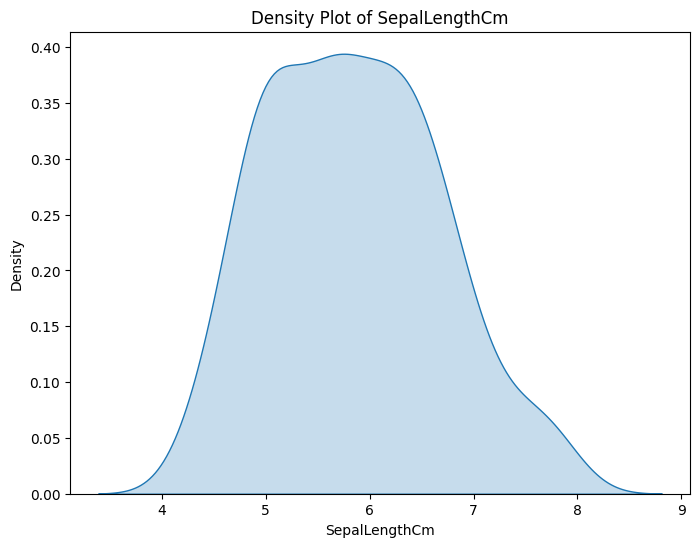

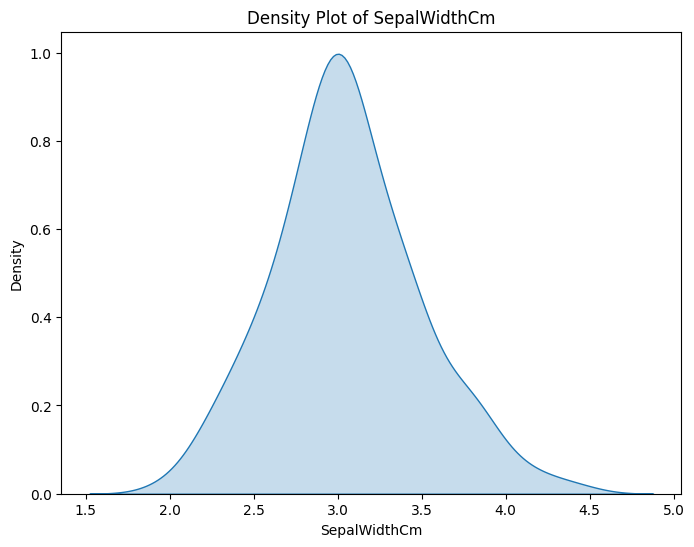

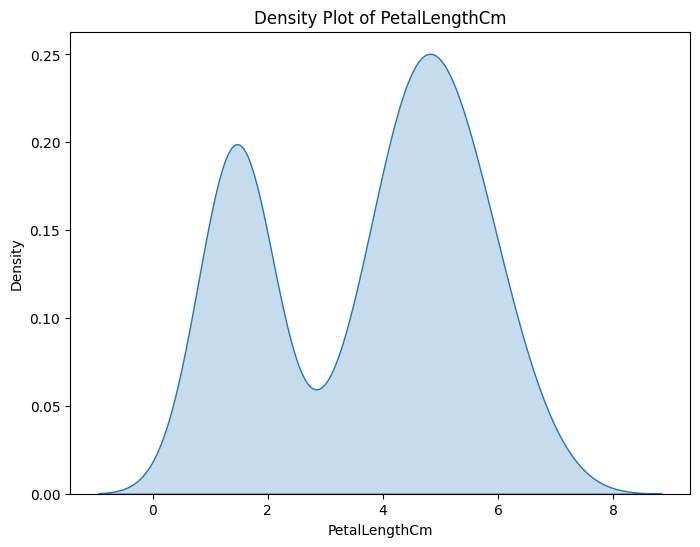

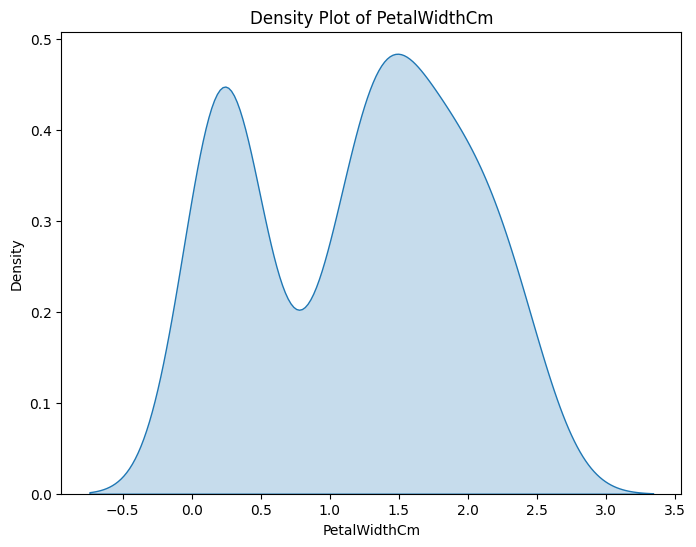

In [64]:

# Density Plots

for col in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data, x=col, fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.show()

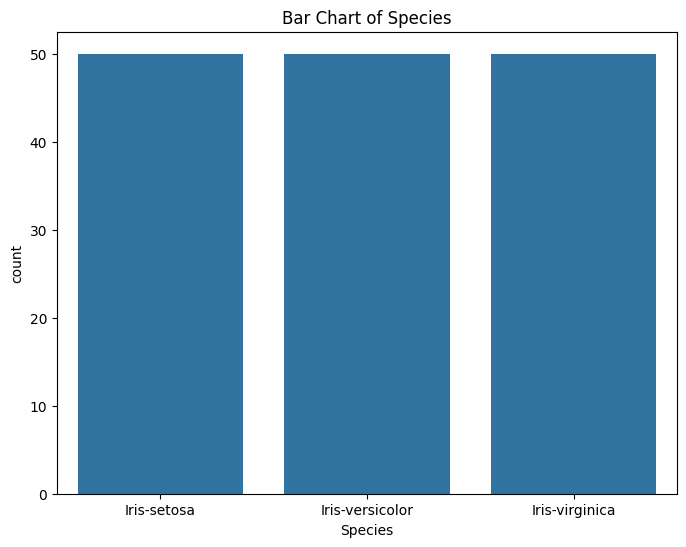

In [65]:
# Bar Charts (for categorical variables)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.show()

+ This is a balanced data

Multivariate Analysis

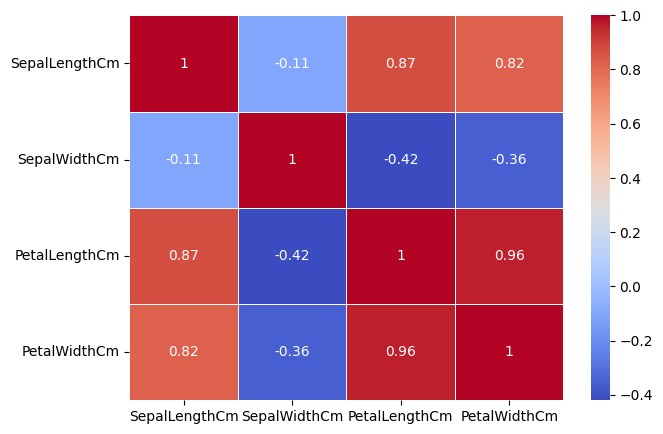

In [66]:
numeric_data = data.drop(columns=['Species'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

+ There is a strong positive correlation among  petalwidth, petallength and sepallength

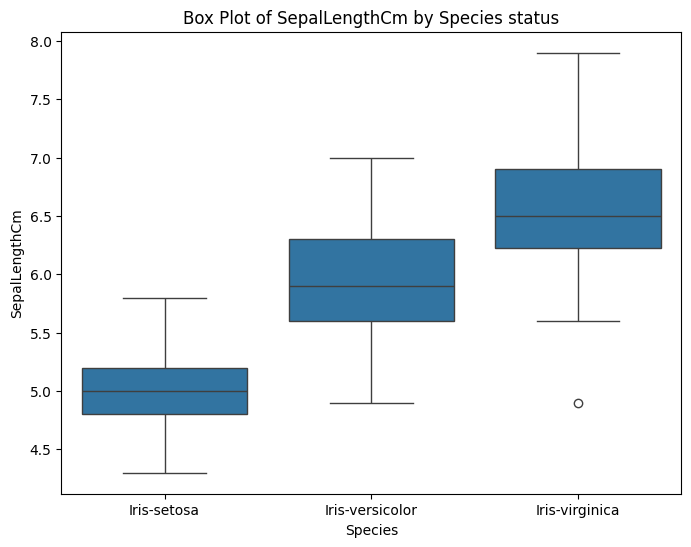

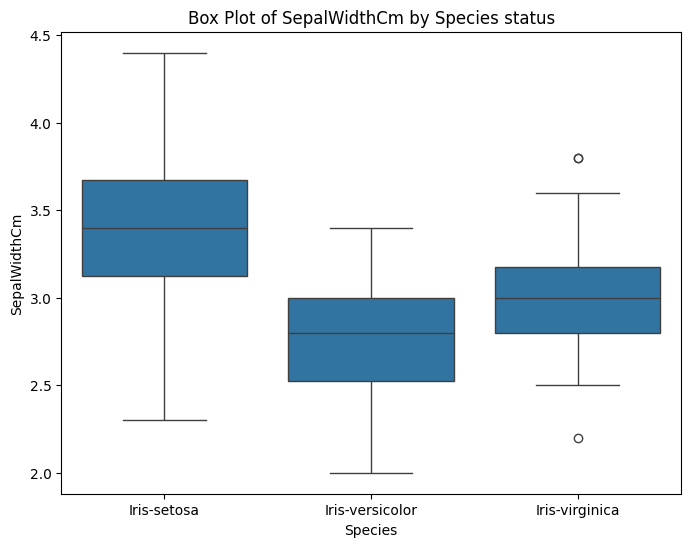

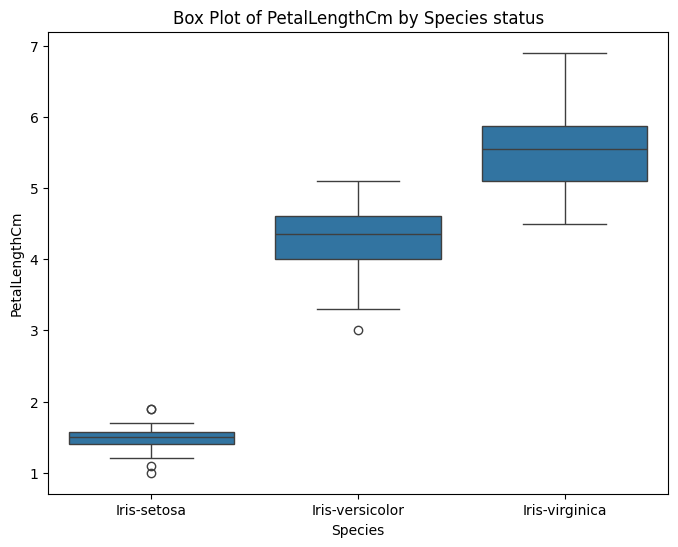

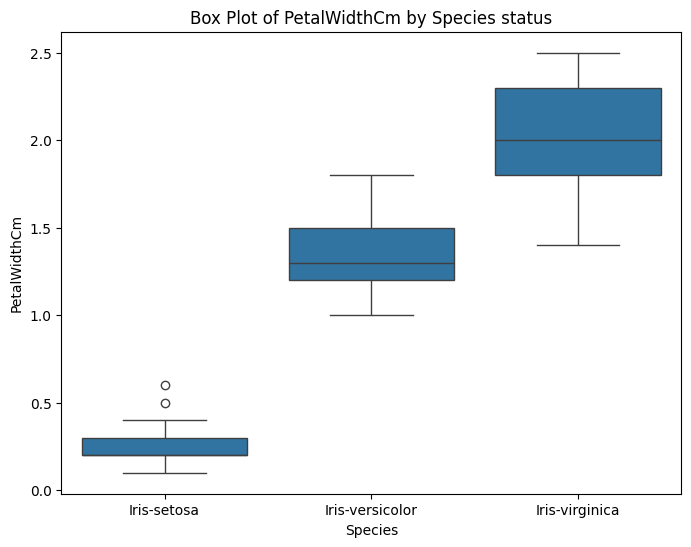

In [67]:
# Box Plots
for col in numeric_data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Species'], y=data[col])
    plt.title(f'Box Plot of {col} by Species status')
    plt.xlabel('Species')
    plt.ylabel(col)
    plt.show()


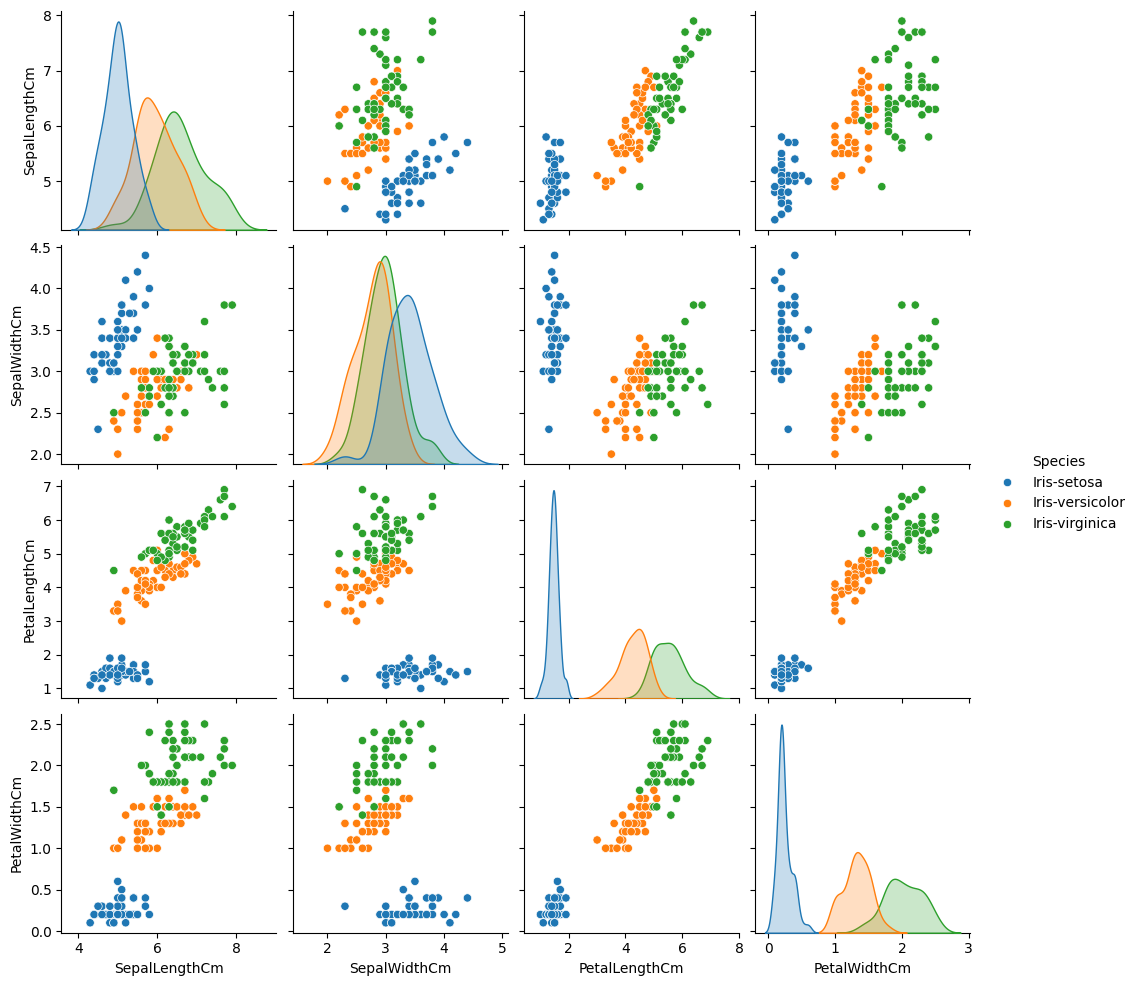

In [68]:
#  Species Identification and Differentiation
sns.pairplot(data, hue='Species')
plt.show()

+ The petal length and width really separated the setosa from the other of the species

Analytical Qustions

1. Which species of Iris is most prevalent in our dataset, and how might this influence our inventory or sales strategies?

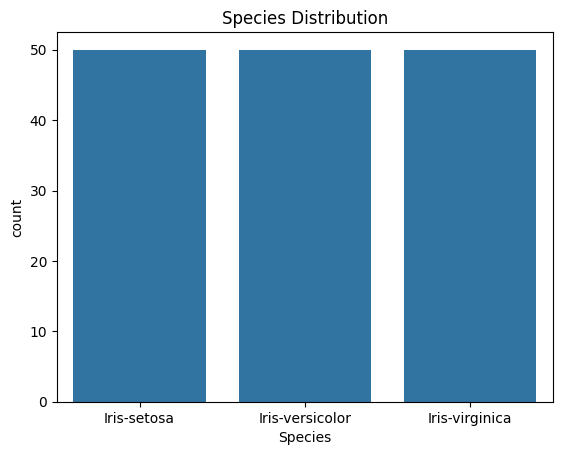

In [69]:
sns.countplot(data=data, x='Species')
plt.title('Species Distribution')
plt.show()

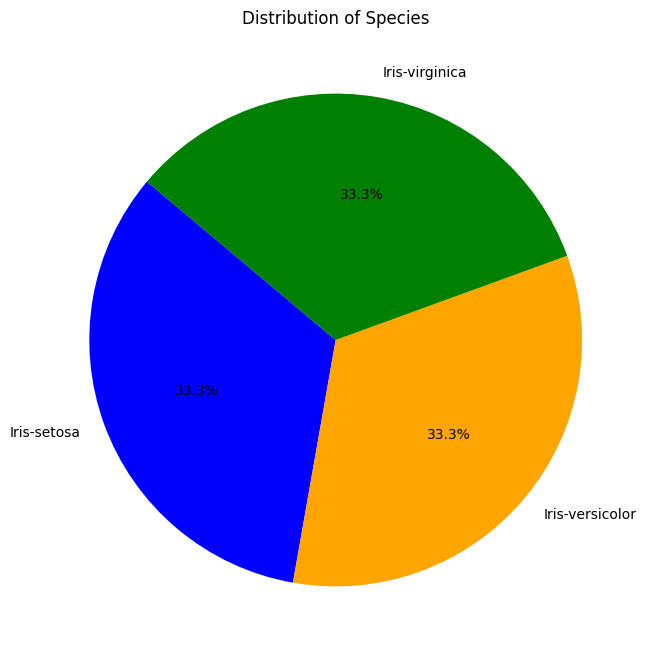

In [70]:
# Counting the occurrences of each species
species_count = data['Species'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(species_count, labels=species_count.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green'])
plt.title('Distribution of Species')
plt.show()

+ The data is balanced
+ The species are evenly spread

2. Can the size and shape of the sepal be used to create a quality grading system for iris plants?

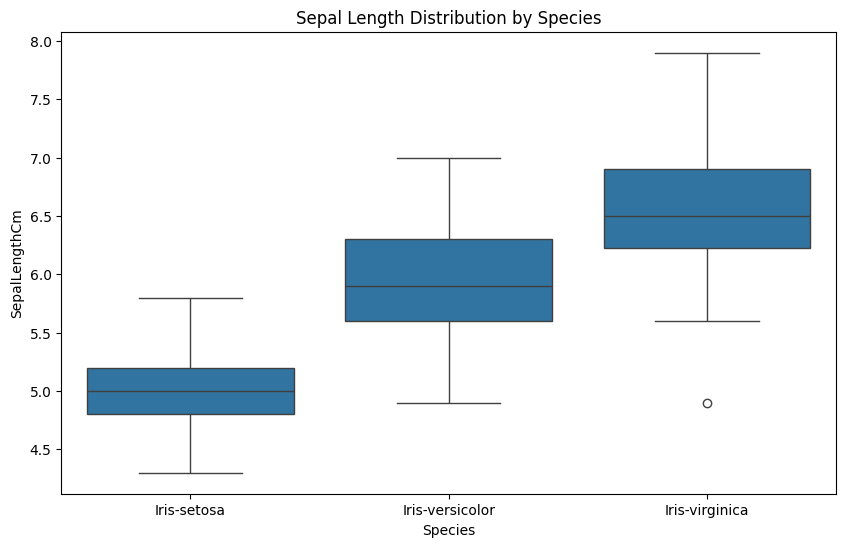

In [71]:
# Identifying species with largest petals
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Species', y='SepalLengthCm')
plt.title('Sepal Length Distribution by Species')
plt.show()

3. What are the key distinguishing features between the different species that can be highlighted in a catalog to attract customers?

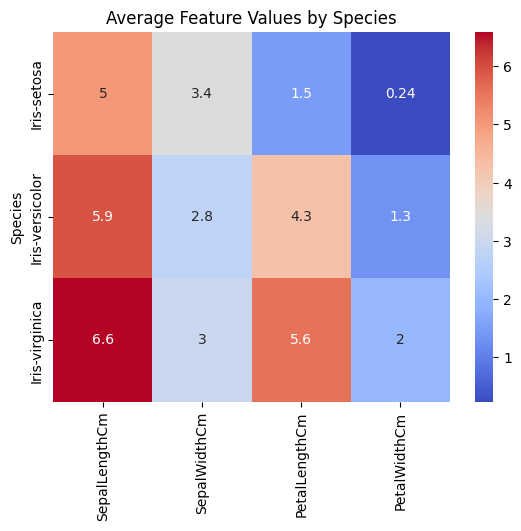

In [72]:
# Key distinguishing features
sns.heatmap(data.groupby('Species').mean(), annot=True, cmap='coolwarm')
plt.title('Average Feature Values by Species')
plt.show()

__Hypothesis__

+ Null Hypothesis (H₀)
The mean petal length is the same for all three species of iris flowers.

+ Alternative Hypothesis (H₁)
At least one species of iris flowers has a mean petal length that is different from the others.

In [73]:

from scipy.stats import f_oneway

# Extract petal lengths for each species
setosa_petal_lengths = data[data['Species'] == 'Iris-setosa']['PetalLengthCm']
virginica_petal_lengths = data[data['Species'] == 'Iris-virginica']['PetalLengthCm']
versicolor_petal_lengths = data[data['Species'] == 'Iris-versicolor']['PetalLengthCm']

# Perform one-way ANOVA
statistic, p_value = f_oneway(setosa_petal_lengths, virginica_petal_lengths,versicolor_petal_lengths)

# Define significance level
alpha = 0.05

# Print the results
print("ANOVA Results:")
print("F-statistic:", statistic)
print("p-value:", p_value)

# Interpret the p-value
if p_value < alpha:
    print("Reject null hypothesis: At least one species of iris flowers has a mean petal length that is different from the others.")
else:
    print("Fail to reject null hypothesis: The mean petal length is the same for setosa and virginica species of iris flowers.")


ANOVA Results:
F-statistic: 1179.0343277002194
p-value: 3.051975801827782e-91
Reject null hypothesis: At least one species of iris flowers has a mean petal length that is different from the others.


+ In conclusion, the mean petal length differs significantly among the species.

## DATA PREPARATION

In [74]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [75]:
# view unique values
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [76]:
# extract species name
data['Species'] = data['Species'].apply(lambda x: x.split('-')[1])

In [77]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [78]:
# Rename the columns

data.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## MODELING AND EVALUATION

Split data into features(X) and target variables(y)

In [79]:
# predictive variable
X = data.drop(columns=['Species'], axis=1)

# target variable
y = data['Species']



In [91]:
X.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], dtype='object')

In [80]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [81]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Split data into test and train

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [83]:
features = X.columns
features

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], dtype='object')

create preprocessor

In [84]:
# create a preprocessor to be applied to data
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='mean'),features),
        ('scaler', StandardScaler(), features)
            ]
)

create a list of models to be trained

In [85]:
# Define models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42, probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Tree-based (Decision Tree)', DecisionTreeClassifier(random_state=42))
]

In [86]:
# view nodels
for model_name, model in models:
    print(f'{model_name}')

Random Forest
Logistic Regression
Support Vector Machine
K-Nearest Neighbors
Tree-based (Decision Tree)


In [87]:
# create table to store metrics
metrics_table = pd.DataFrame(columns=['Model Name','Precision','Recall','Accuracy','F1_Score'])

# initialize dictionary to store pipelines
pipelines = {}


#loop and train models
for model_name, model in models:
    pipeline= Pipeline(steps=[
     ('preprocessor',preprocessor),
    ('feature importance',SelectKBest(mutual_info_classif,k='all')),
    ('classifier',model)
    ])

    #fit train data to pipeline
    pipeline.fit(X_train,y_train)

    # make prediction on the test set
    y_pred = pipeline.predict(X_test)
   
    # store classification report in a dictionary
    metrics = classification_report(y_test, y_pred, output_dict= True)

    #save each pipeline in the loop in the dictionary
    pipelines[model_name]= pipeline

    # get values from metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # add these metric values to the table
    metrics_table.loc[len(metrics_table)] = [model_name,accuracy,precision,recall,f1]

#sort values by f1_score in descending
metrics_table.sort_values('F1_Score',ascending=False)

,Model Name,Precision,Recall,Accuracy,F1_Score
1,Logistic Regression,0.966667,0.969697,0.966667,0.966583
2,Support Vector Machine,0.966667,0.969697,0.966667,0.966583
4,Tree-based (Decision Tree),0.966667,0.969697,0.966667,0.966583
3,K-Nearest Neighbors,0.933333,0.944444,0.933333,0.932660
0,Random Forest,0.900000,0.902357,0.900000,0.899749


# Hyperparameter Tuning

In [88]:
# Define the parameter grids

models = [
    ('Random Forest', RandomForestClassifier(), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    }),
    ('Logistic Regression', LogisticRegression(max_iter=1000), {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'lbfgs']
    }),
    ('Support Vector Machine', SVC(probability=True), {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf']
    }),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }),
    ('Decision Tree', DecisionTreeClassifier(), {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    })
]


In [89]:
# Create table to store metrics
metrics_table = pd.DataFrame(columns=['Model Name', 'Precision', 'Recall', 'Accuracy', 'F1_Score'])

# Initialize dictionary to store pipelines
pipelines = {}

# Loop and train models
for model_name, model, param_grid in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', model)
    ])

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best pipeline
    best_pipeline = grid_search.best_estimator_

    # Make prediction on the test set
    y_pred = best_pipeline.predict(X_test)
    y_pred_proba = best_pipeline.predict_proba(X_test)  # Get the probabilities

    # Store classification report in a dictionary
    metrics = classification_report(y_test, y_pred, output_dict=True)

    # Save each pipeline in the loop in the dictionary
    pipelines[model_name] = best_pipeline

    # Get values from metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # Add these metric values to the table
    metrics_table.loc[len(metrics_table)] = [model_name, precision, recall, accuracy, f1]

# Sort values by F1_Score in descending order
metrics_table = metrics_table.sort_values('F1_Score', ascending=False)

# Display the metrics table
print(metrics_table)


               Model Name  Precision    Recall  Accuracy  F1_Score
0           Random Forest   0.969697  0.966667  0.966667  0.966583
1     Logistic Regression   0.969697  0.966667  0.966667  0.966583
2  Support Vector Machine   0.969697  0.966667  0.966667  0.966583
3     K-Nearest Neighbors   0.969697  0.966667  0.966667  0.966583
4           Decision Tree   0.902357  0.900000  0.900000  0.899749
